Sedan : 0.8757


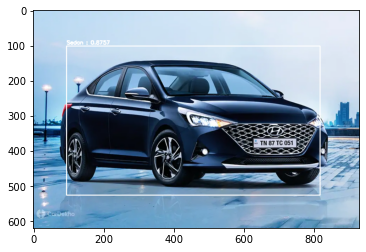

True

In [8]:
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt


INPUT_FILE=r"C:\Users\Hard Parikh\Desktop\test_image.jpg"
OUTPUT_FILE=r"C:\Users\Hard Parikh\darknet-car_type\darknet-master\build\darknet\x64\predictions_tf.jpg"
LABELS_FILE=r"C:\Users\Hard Parikh\darknet-car_type\darknet-master\build\darknet\x64\data\obj.names.names"
CONFIG_FILE=r"C:\Users\Hard Parikh\darknet-car_type\darknet-master\build\darknet\x64\cfg\yolov4-obj.cfg"
WEIGHTS_FILE=r"C:\Users\Hard Parikh\darknet-car_type\darknet-master\build\darknet\x64\backup\yolov4-obj_last.weights"
CONFIDENCE_THRESHOLD=0.4

LABELS = open(LABELS_FILE).read().strip().split("\n")

net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

image = cv2.imread(INPUT_FILE)
(H, W) = image.shape[:2]

ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
    swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()


boxes = []
confidences = []
classIDs = []

for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        if confidence > CONFIDENCE_THRESHOLD:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,CONFIDENCE_THRESHOLD)

if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        cv2.rectangle(image, (x, y), (x + w, y + h), (255,255,255), 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[classIDs[i]])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, (255,255,255), 2)
        print(text)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite(r"C:\Users\Hard Parikh\Desktop\Mini-Project\car_type.jpg", image)